### LightGBM

**LightGBM** is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient, capable of handling large-scale data and providing high performance. LightGBM is often used for both classification and regression tasks.

**LightGBM** is an open-source, distributed, high-performance gradient boosting framework that is part of ***Microsoft's Distributed Machine Learning Toolkit (DMTK) project***. This project aims to develop and improve decision tree algorithms for a variety of machine learning tasks, including ranking, classification, and regression. Microsoft maintains LightGBM, which ensures its integration and performance enhancements within the broader ecosystem, such as SynapseML for Microsoft Fabric and Azure Machine Learning​ (MS Learn)​​ (GitHub)​.

#### Key Concepts

- **Gradient Boosting**: LightGBM uses gradient boosting, which builds an ensemble of weak learners (typically decision trees) in a sequential manner. Each new model is trained to correct the errors made by the previous models.

- **Leaf-wise Tree Growth**: Unlike many other gradient boosting implementations that grow trees level-wise, LightGBM grows trees leaf-wise. This can lead to better accuracy but may also increase the risk of overfitting.
![leaf-wise](../images/leaf-wise_gbm.png)  
ref: https://www.researchgate.net/figure/Comparison-of-level-wise-and-leaf-wise-tree-growth-strategies_fig2_373697783

- **Histogram-based Algorithm**: LightGBM uses a histogram-based algorithm for finding the best split, which reduces memory consumption and speeds up training.

#### Advantages

- **Efficiency**: LightGBM is designed to be highly efficient in both training speed and memory usage.
- **Scalability**: It can handle large-scale data and is optimized for distributed computing.
- **Accuracy**: Often achieves high accuracy due to its leaf-wise tree growth and efficient handling of large datasets.
- **Support for Categorical Features**: LightGBM can directly handle categorical features without needing extensive preprocessing like one-hot encoding.

#### Parameters
The leaf-wise tree growth in LightGBM can indeed lead to a risk of overfitting, particularly on small datasets or datasets with noisy data. This is because the leaf-wise growth approach tends to create deeper trees with more complex structures that can perfectly fit the training data, capturing not only the underlying patterns but also the noise.

To mitigate the risk of overfitting, it's crucial to set parameters that control the complexity of the model. Two important parameters in this context are max_depth and num_leaves.


##### n_estimators
- **Meaning**: The number of decision trees in the LightGBM model.
- **Impact**: More trees can improve the model's performance but also increase computational cost. Generally, more trees lead to better performance up to a point of diminishing returns.

##### max_depth
- **Meaning**: The maximum depth of each decision tree.
- **Impact**: Deeper trees can model more complex patterns but are more likely to overfit. Shallow trees may underfit the data.

##### learning_rate
- **Meaning**: The step size shrinkage used in each boosting step.
- **Impact**: A lower learning rate usually improves performance but requires more trees. A higher learning rate increases the speed of training but may reduce accuracy.

##### num_leaves
- **Meaning**: The maximum number of leaves in one tree.
- **Impact**: More leaves can improve the accuracy of the model but also increase the risk of overfitting.

### Summary
- **LightGBM**: A gradient boosting framework that uses tree-based learning algorithms. It is designed to be efficient, scalable, and capable of handling large-scale data, often achieving high accuracy. Key features include leaf-wise tree growth and support for categorical features.


In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the LightGBM model
model = LGBMClassifier(random_state=42, max_depth=10, n_estimators=100, num_leaves=50, subsample=0.8, colsample_bytree=0.8, subsample_freq=1, min_child_weight=0.001, min_split_gain=0.0, objective='binary')
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Custom thresholds
thresholds = np.arange(0, 1.1, 0.1)

# Initialize lists for confusion matrix components
tps = []
fps = []
tns = []
fns = []

# Calculate true positives, false positives, true negatives, and false negatives for each threshold
for threshold in thresholds:
    temp_prediction = [1 if y >= threshold else 0 for y in y_pred_proba]
    tn, fp, fn, tp = confusion_matrix(y_test, temp_prediction).ravel()
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)


[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3964
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [13]:
# Create the dataframe with thresholds, true positives, false positives, true negatives, and false negatives
df_confusion_matrix = pd.DataFrame({'Thresholds': thresholds, 
                                    'TruePositive': tps, 'FalsePositive': fps,
                                    'TrueNegative': tns, 'FalseNegative': fns})

# Calculate recall, precision, F1 score, and false positive ratio
df_confusion_matrix["recall"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalseNegative"])
df_confusion_matrix["precision"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalsePositive"])
df_confusion_matrix["f1_score"] = 2 * (df_confusion_matrix["precision"] * df_confusion_matrix["recall"]) / (df_confusion_matrix["precision"] + df_confusion_matrix["recall"])

# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_matrix DataFrame to two decimal places
df_confusion_matrix_graph = df_confusion_matrix.round(3)

fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()



Feature importances:
worst texture: 147.0000
worst concave points: 147.0000
mean concave points: 120.0000
mean texture: 110.0000
worst perimeter: 101.0000
worst radius: 68.0000
area error: 67.0000
worst smoothness: 65.0000
mean radius: 57.0000
worst area: 54.0000
worst concavity: 53.0000
compactness error: 47.0000
texture error: 47.0000
radius error: 39.0000
mean smoothness: 39.0000
mean perimeter: 39.0000
symmetry error: 39.0000
mean concavity: 38.0000
concave points error: 37.0000
worst symmetry: 36.0000
perimeter error: 36.0000
worst compactness: 31.0000
mean symmetry: 29.0000
mean compactness: 29.0000
mean fractal dimension: 25.0000
fractal dimension error: 22.0000
smoothness error: 21.0000
mean area: 21.0000
worst fractal dimension: 20.0000
concavity error: 18.0000


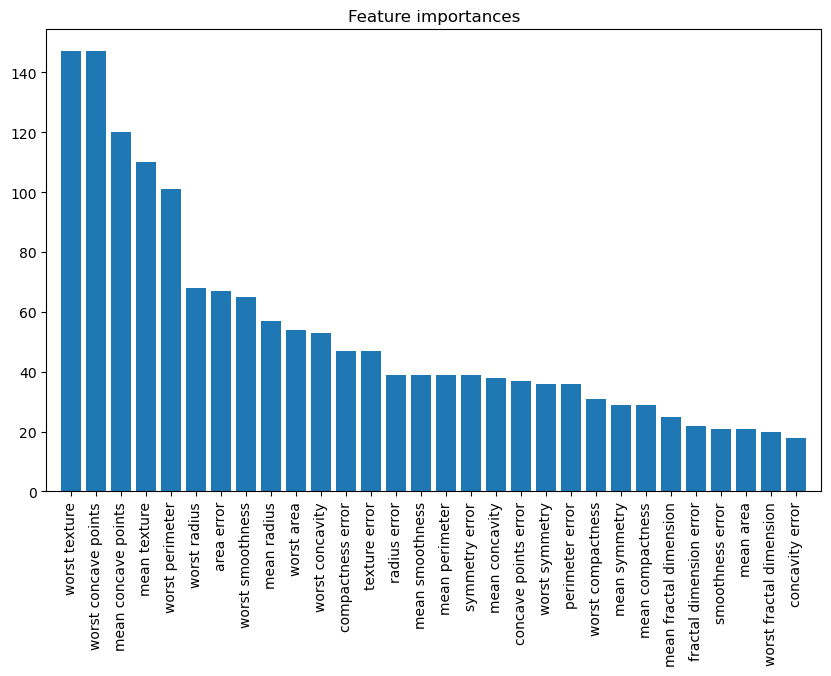

In [14]:
# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = breast_cancer.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
Mean Squared Error: 0.2115
R-Squared: 0.8386
Feature importances:
Longitude: 697.0000
Latitude: 657.0000
AveOccup: 390.0000
MedInc: 376.0000
AveRooms: 253.0000
HouseAge: 248.0000
Population: 202.0000
AveBedrms: 177.0000


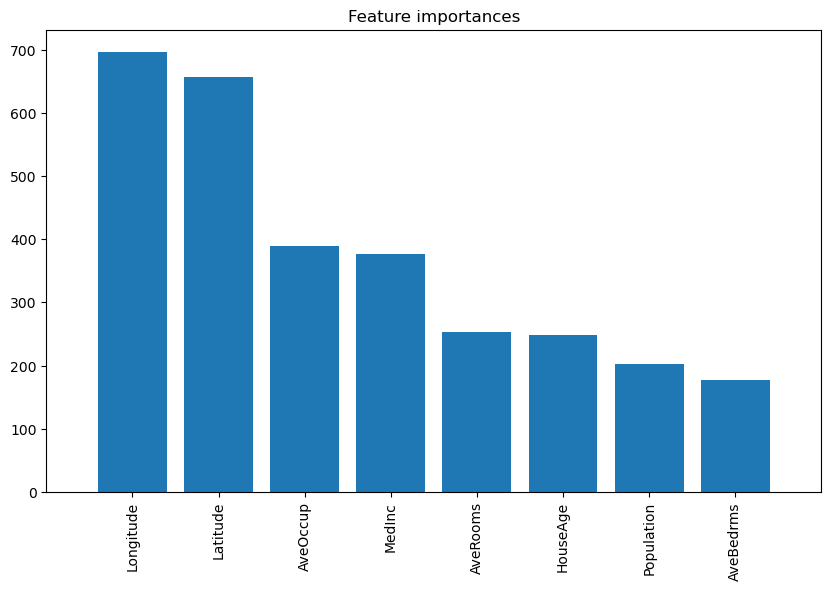

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the LightGBM model
model = LGBMRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves.

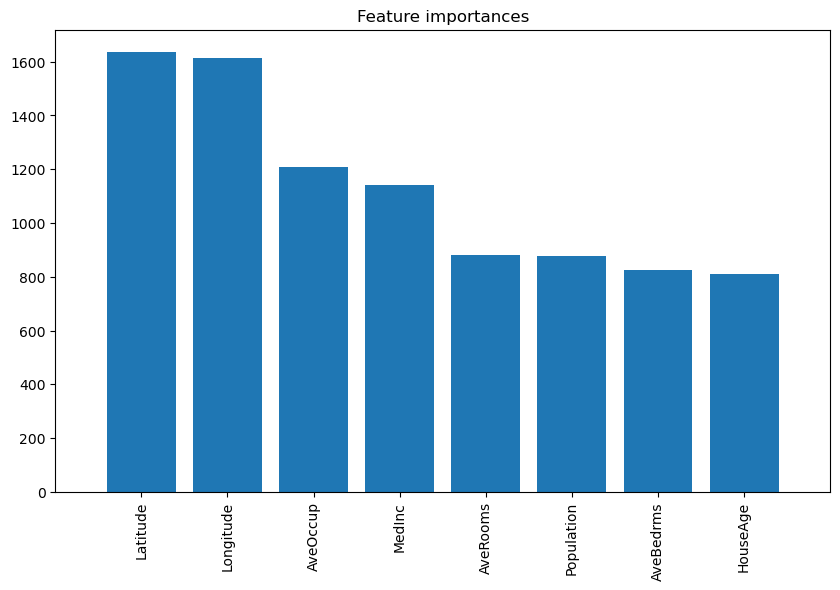

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialize the LightGBM model
model = LGBMRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
